In [31]:
import pandas as pd
df = pd.read_csv('uci-news-aggregator.csv')

In [97]:
import numpy as np

selection = df[df["TITLE"].str.contains("US")]

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
indices = []
values = []
for index, row in selection.iterrows():
    value = analyzer.polarity_scores(row["TITLE"])["compound"]
    #print(value , " " , row["TITLE"])
    values.append(value)
    indices.append(index)
print(np.mean(values))

-0.00890127392017


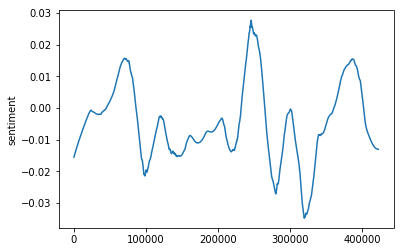

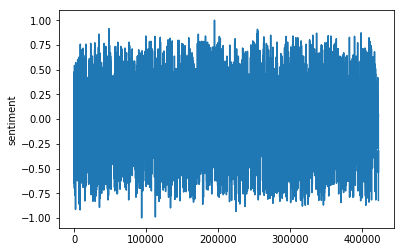

In [98]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
lowess = sm.nonparametric.lowess(values, indices, frac=0.1)
plt.plot(lowess[:, 0], lowess[:, 1])
plt.ylabel('sentiment')
plt.show()

plt.plot(indices, values)
plt.ylabel('sentiment')
plt.show()